In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/datadomashka/tmdb-movies.csv


In [30]:
#loading the csv file and storing it in the variable "x"
x=pd.read_csv("../input/datadomashka/tmdb-movies.csv")
# printing first 10 rows of this data
x.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

1)As we can from the above example, certain columns, like ‘cast’ and ‘genres’,'release_date', 'product_companies','director' contain multiple values separated by pipe (|) characters

2) The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.


In [31]:
# printint the shape of the data (to see how many columns and rows, data has.)
print(x.shape)
print(x.dtypes)
print(type(x['release_date'][0]))

(10866, 21)
id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object
<class 'str'>


1) As we can see, column "release_date" is string, but it should be datetime. So we need to fix it.

2) Also, there are 10866 rows and 21 columns.


In [32]:
# Counting the number of distinct elements in data "x"
# Summary statistics of data "x"
print(x.nunique())
print(x.describe())

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64
                  id    popularity        budget       revenue       runtime  \
count   10866.000000  10866.000000  1.086600e+04  1.086600e+04  10866.000000   
mean    66064.177434      0.646441  1.462570e+07  3.982332e+07    102.070863   
std     92130.136561      1.000185  3.091321e+07  1.170035e+08     31.381405   
min         5.000000      0.000065  0

We can see from this data the average popularity  is 0.64 anu

In [33]:
#printing concise summary of the dataframe "x"
print(x.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

From the above table, we can see that some columns such as imdb_id, homepage, production_companies, keywords,tagline has missing values.

In [34]:
# finding number of duplicates in the data "x"
sum(x.duplicated())
#dropping duplicates
x.drop_duplicates(inplace=True)

There is one duplicate in this data.
We will use drop_duplicates to drop it.

In [35]:
#confirming whether we have duplicates
sum(x.duplicated())


0

In [36]:
#changing type of data of release_year variable to datetime 
x['release_year']= pd.to_datetime(x['release_year'])
#priting first 5 variables of data "x"
x.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,1970-01-01 00:00:00.000002015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,1970-01-01 00:00:00.000002015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,1970-01-01 00:00:00.000002015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,1970-01-01 00:00:00.000002015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,1970-01-01 00:00:00.000002015,1.747999e+08,1.385749e+09


In [37]:
#Checking the data type of release_year variable, to confirm whether it became datetime64 type.
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   imdb_id               10855 non-null  object        
 2   popularity            10865 non-null  float64       
 3   budget                10865 non-null  int64         
 4   revenue               10865 non-null  int64         
 5   original_title        10865 non-null  object        
 6   cast                  10789 non-null  object        
 7   homepage              2936 non-null   object        
 8   director              10821 non-null  object        
 9   tagline               8041 non-null   object        
 10  keywords              9372 non-null   object        
 11  overview              10861 non-null  object        
 12  runtime               10865 non-null  int64         
 13  genres          

We changed release_year from string to datetime64 format.
Right now, let's try to fix certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. First we need to find number of columsn in cast and genres'

In [38]:
#checking for missing variables
x.isnull().sum()


id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Still we have so many missing values in columns cast, homepage director, tagline, keywords, overview, genres, production companies. Let's get rid of some of this data.

In [39]:
#dropping unnecessary columns for our analysis
x.drop(['imdb_id', 'homepage','tagline', 'keywords', 'overview', 'budget_adj','revenue_adj','production_companies'],axis =1,inplace = True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10865 non-null  int64         
 1   popularity      10865 non-null  float64       
 2   budget          10865 non-null  int64         
 3   revenue         10865 non-null  int64         
 4   original_title  10865 non-null  object        
 5   cast            10789 non-null  object        
 6   director        10821 non-null  object        
 7   runtime         10865 non-null  int64         
 8   genres          10842 non-null  object        
 9   release_date    10865 non-null  object        
 10  vote_count      10865 non-null  int64         
 11  vote_average    10865 non-null  float64       
 12  release_year    10865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.2+ MB


As we can all rows in both columns separated by pipe (|) characters 

In [40]:
## Checking how many missing variables, we have by dropping unnecessary columns
x.isnull().sum()


id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

We still have some missing values, let's just delete all missing values 

In [41]:
#dropping missing variables
x.dropna(inplace=True)
print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10731 non-null  int64         
 1   popularity      10731 non-null  float64       
 2   budget          10731 non-null  int64         
 3   revenue         10731 non-null  int64         
 4   original_title  10731 non-null  object        
 5   cast            10731 non-null  object        
 6   director        10731 non-null  object        
 7   runtime         10731 non-null  int64         
 8   genres          10731 non-null  object        
 9   release_date    10731 non-null  object        
 10  vote_count      10731 non-null  int64         
 11  vote_average    10731 non-null  float64       
 12  release_year    10731 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 1.1+ MB
None


It looks now we don't have any missing values. Let's start our analysis:


In [42]:
# Checking revenues column whether it has 0  and printing these rows
revenue_zero = x['revenue'] == 0
print(x[revenue_zero].info())
print(x[revenue_zero])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5888 entries, 48 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              5888 non-null   int64         
 1   popularity      5888 non-null   float64       
 2   budget          5888 non-null   int64         
 3   revenue         5888 non-null   int64         
 4   original_title  5888 non-null   object        
 5   cast            5888 non-null   object        
 6   director        5888 non-null   object        
 7   runtime         5888 non-null   int64         
 8   genres          5888 non-null   object        
 9   release_date    5888 non-null   object        
 10  vote_count      5888 non-null   int64         
 11  vote_average    5888 non-null   float64       
 12  release_year    5888 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 644.0+ KB
None
           id  populari

From here, we can see that there are 5888 rows have revenue zero, some of them have also budget zero 0, it is super strange, so let's just delete them

In [43]:
#printing index of revenue rows that has zero in revenue column
print(x[revenue_zero].index.values)

[   48    67    74 ... 10863 10864 10865]


In [44]:
#dropping  revenue=0 in column revenue t
z=x[revenue_zero].index.values
x.drop(index=z,inplace=True)
print(x.info())
print(x[revenue_zero].index.values)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4843 entries, 0 to 10848
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              4843 non-null   int64         
 1   popularity      4843 non-null   float64       
 2   budget          4843 non-null   int64         
 3   revenue         4843 non-null   int64         
 4   original_title  4843 non-null   object        
 5   cast            4843 non-null   object        
 6   director        4843 non-null   object        
 7   runtime         4843 non-null   int64         
 8   genres          4843 non-null   object        
 9   release_date    4843 non-null   object        
 10  vote_count      4843 non-null   int64         
 11  vote_average    4843 non-null   float64       
 12  release_year    4843 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(5), object(5)
memory usage: 529.7+ KB
None
[]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


As we can see right now there is no rows that has revenue=0.
Let's start our analysis

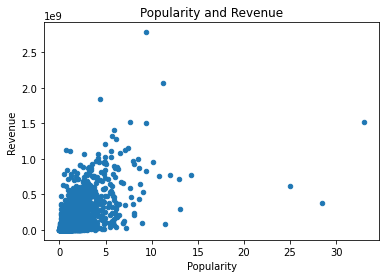

In [45]:
##importing package matplotlib.pyplot to plot our graphs
import matplotlib.pyplot as plt

#Let's create scatter plot 
x.plot(x='popularity',y='revenue',kind='scatter')
plt.title('Popularity and Revenue')
plt.xlabel('Popularity')
plt.ylabel('Revenue');

As we can't see it is not really clear with the above graph, relationship between popularity and revenue.
Alternative way, could be finding correlation between popularity and revenue.

In [46]:
#Finding the correlation between popularity and revenue
print(np.corrcoef(x["popularity"],x["revenue"] ))


[[1.         0.62916673]
 [0.62916673 1.        ]]


From the above, we can see positive correlation between popularity and revenue.

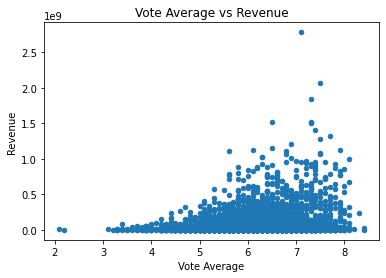

In [47]:
#Let's create scatter plot of vote_average and revenue
x.plot(x='vote_average',y='revenue',kind='scatter')
plt.title('Vote Average vs Revenue')
plt.xlabel('Vote Average')
plt.ylabel('Revenue');

As we can from this graph, more vote average, more it generates revenue. But to get more deep understanding, let's find correlation between vote average and revenue.

In [48]:
# finding correlation between vote_average and revenue.
print(np.corrcoef(x["vote_average"],x["revenue"] ))


[[1.         0.20715738]
 [0.20715738 1.        ]]


As we can see that there is positive correlation between vote_average and revenue. However, we can see correlation of revenue is more strong with popularity variable.

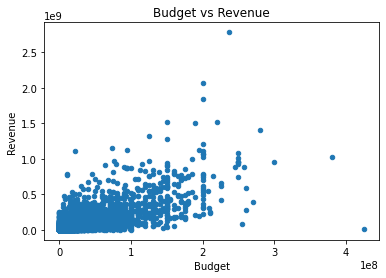

In [49]:
#Let's create scatter plot of budget and revenue
x.plot(x='budget',y='revenue',kind='scatter')
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue');

It is not clear from this graph correlation between budget and revenue. let's try to find correlation between these 2 variables. 

In [50]:
#Finding correlation between budget and revenue
print(np.corrcoef(x["budget"],x["revenue"] ))

[[1.         0.70389905]
 [0.70389905 1.        ]]


As we can there is higher correlation between budget and revenue. So, it means more you have budget more you can generate. It is kind of logical, because if you invest more, you can hire more popular actors and use better expensive cameras, which will increase customer's satisfaction with movie, in turn generate more revenue. 

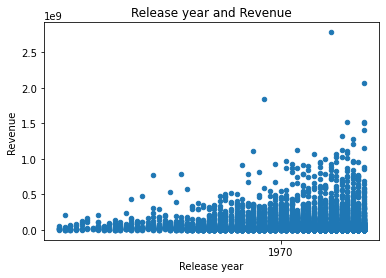

In [51]:
#Let's create scatter plot of release_year and revenue
x.plot(x='release_year',y='revenue',kind='scatter')
plt.title('Release year and Revenue')
plt.xlabel('Release year')
plt.ylabel('Revenue');

As we can see that over year movies generated more revenue, which can be also associate with growth of economy as well as growth of inflation. 

Overall, we can see that budget had the highest correlation with revenue, which was around 0.7 it means if you increase budget by 1000 dollars, your revenue will also increase to 700 dollars.
Then 2 highest correlation was with popularity, which was around 0.629. Which is kind of logical, more popular movie, more customer will watch this movie, in turn it will generate more revenue.
Also, there is positive correlation between vote_average variable and revenue. Which also means, higher the average votes for movie, we expect that revenue will also increase.

Also, I made graph to check relationship between release_year variable and revenue. Overall, it seems that movies started to generated more revenue than before, which can be explained by growing economy and higher population, and different platforms to watch movies as netflix etc.

In [63]:
# Finding rows inside of column genres that contains '|'

b=x[x['genres'].str.contains('|')]
print(b.head())




       id  popularity     budget     revenue                original_title  \
0  135397   32.985763  150000000  1513528810                Jurassic World   
1   76341   28.419936  150000000   378436354            Mad Max: Fury Road   
2  262500   13.112507  110000000   295238201                     Insurgent   
3  140607   11.173104  200000000  2068178225  Star Wars: The Force Awakens   
4  168259    9.335014  190000000  1506249360                     Furious 7   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...       J.J. Abrams   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...         James Wan   

   runtime                                     genres release_date  \
0      124  Acti

In [64]:
#we created function to find rows inside of column genres that contains '|'
def find(column):
    return x[x[column].str.contains('|')]

In [69]:
# let's use our new function, it works
find("genres").head(5)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,1970-01-01 00:00:00.000002015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,1970-01-01 00:00:00.000002015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,1970-01-01 00:00:00.000002015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,1970-01-01 00:00:00.000002015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,1970-01-01 00:00:00.000002015


In [53]:
# Splitting genres's rows that have '|' and counting the number of the genres that are popular
a = x["genres"].str.cat(sep = '|')
b = pd.Series(a.split('|'))
popular_genres=b.value_counts(ascending=False)
print(popular_genres)

Drama              2271
Comedy             1770
Thriller           1422
Action             1260
Romance             876
Adventure           843
Crime               773
Science Fiction     586
Horror              561
Family              513
Fantasy             461
Mystery             410
Animation           237
Music               184
History             153
War                 137
Documentary          97
Western              65
Foreign              30
TV Movie              1
dtype: int64


As we can see that drama and comedy are the most popular genres over the years.

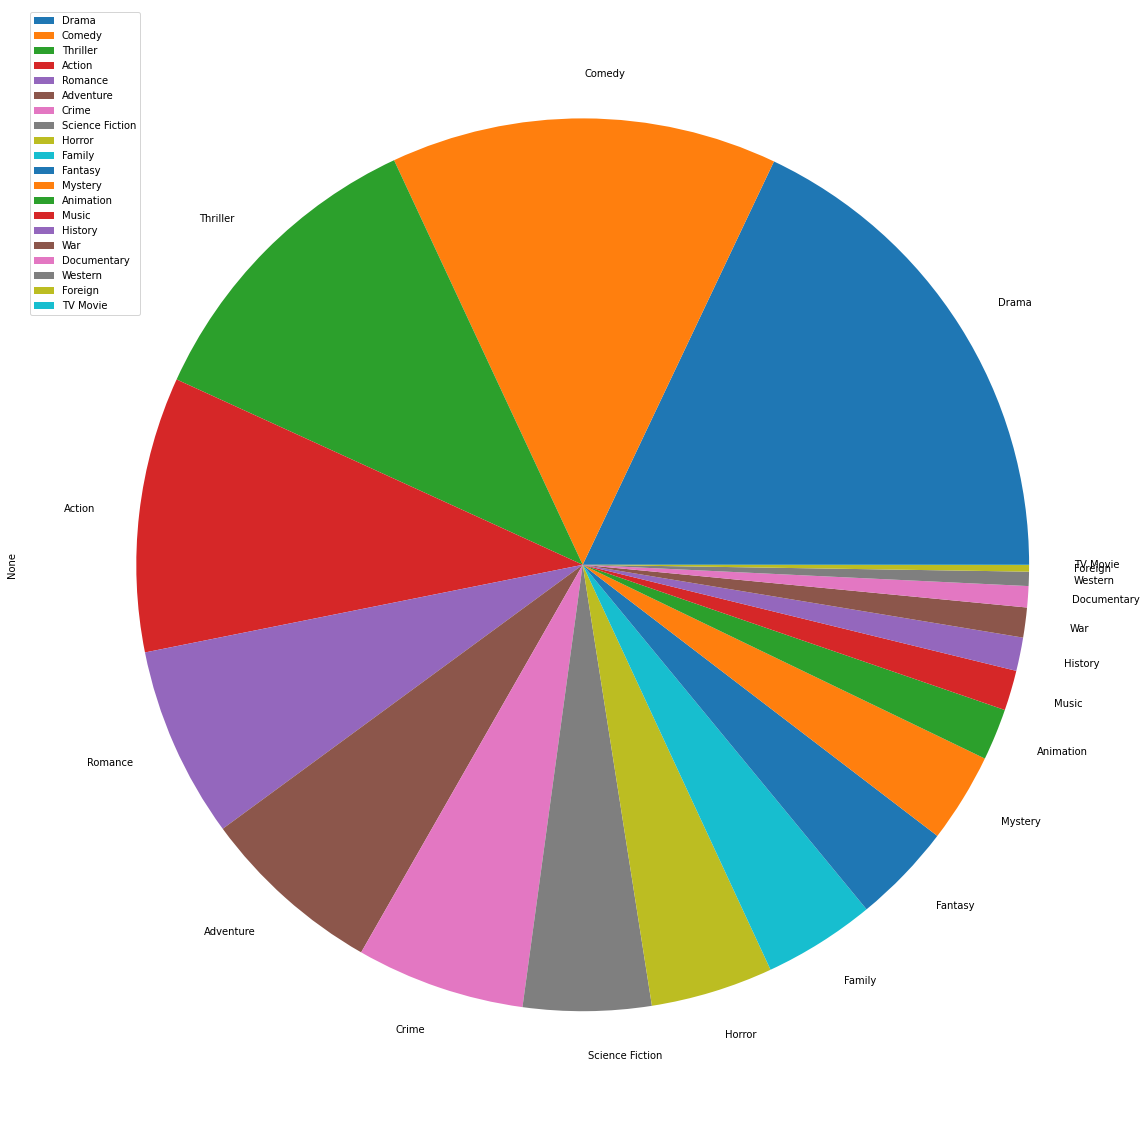

In [54]:
#Plotting pie chart of the popular genres of movies
plot = popular_genres.plot.pie(subplots=True, figsize=(20, 40))
plt.legend(loc="best")

As we can see fropm the graph,genres such as comedy, drama and thriless are the most popular.

Right now we have 4843 values, that ha